In [1]:
#%matplotlib inline 
%matplotlib notebook
import numpy as np

#ccPercentage
ccPercentage = 0.1523019480718742
#ethPriceSum in ETH
ethPriceSum  = 70000

ccPriceSum = ethPriceSum * (0.1523019480718742/100)

print("Carbon Credits Total(ETH):{}".format(ccPriceSum))

print("Total Ethereums:{}".format(ethPriceSum))

#Consider generating random numbers between that match promotios per ethereum that we got to reach our goal:
promo = [300,275,250,225]
DTSlst = np.random.randint(0, 4, int(ethPriceSum))
DTSlst = np.array(list(map(lambda x: promo[x], DTSlst)))

#total supply per ethereums + decas to contract owner
DTS = 1.025* DTSlst.sum()
print("DECAS Total Supply:{}".format(DTS))

#Price Per Deca in ETH
PPD = (ccPriceSum + ethPriceSum) / DTS
print("Price per Deca:{}".format(PPD))

#Verification Code:
assert (ethPriceSum+ccPriceSum==PPD*DTS), "Error in verification"
print('{0}={1}'.format(ethPriceSum+ccPriceSum,PPD*DTS))

Carbon Credits Total(ETH):106.61136365031194
Total Ethereums:70000
DECAS Total Supply:18824868.125
Price per Deca:0.0037241488704266986
70106.61136365031=70106.61136365031


<IPython.core.display.Javascript object>


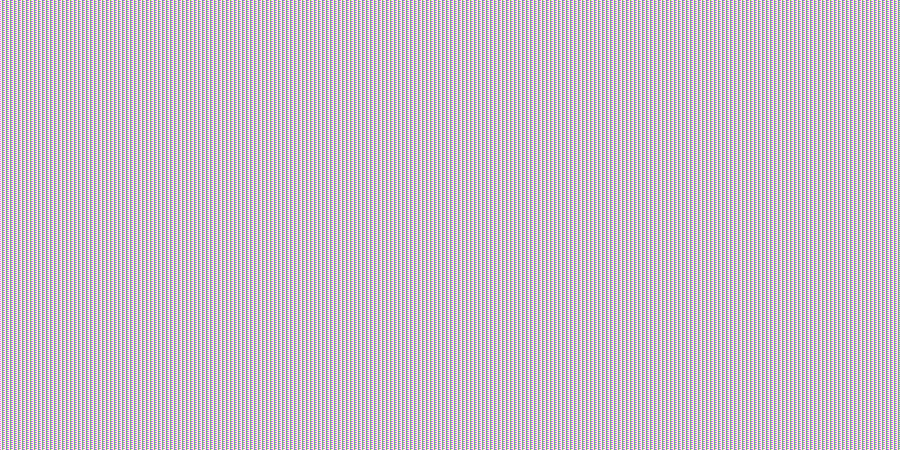

In [2]:
import matplotlib.pyplot as plt
#the pie chart
fig, ax = plt.subplots(figsize=(9, 4.5), subplot_kw=dict(aspect="equal"))

commodities = ["{} Carbon_Credits".format(ccPriceSum),
          "{} Ethereum".format(ethPriceSum)]

data = [float(x.split()[0]) for x in commodities]
backup = [x.split()[-1] for x in commodities]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} ETH)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, backup,
          title="DECAs Backup",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("DECA: Commodities")

plt.show()
#plt.savefig("DecaPieChart.png")

In [3]:
from IPython.display import display, HTML
from fix42D import fix42D
import pandas as pd

#create the DataFrame
preICOStart = '07-01-2020' #MM-DD-YYYY
days = 77
dRan1 = pd.date_range(start = preICOStart, periods = days) 

#77 days dataframe
df = pd.DataFrame(dRan1)
df = df.rename(columns={0: "dates"})
#df = df.set_index('dates', drop = True) 

#Total DECAS by Day (bought) 
df1 = pd.DataFrame(fix42D(days,DTSlst))
df1 = df1.sum(axis=1)
df1 = df1.to_frame(name = 'TotalDecasByDay')

#Total Ethereums by Day (invested)
ETHlst = np.ones(int(ethPriceSum))
df2 = pd.DataFrame(fix42D(days,ETHlst))
df2 = df2.sum(axis=1)
df2 = df2.to_frame(name = 'TotalETHByDay')

#concat the dataframes
result = pd.concat([df, df1, df2], axis=1, sort=False)
#Deca Total Supply by day
result['DecaTotalSupply'] = 0
for i in range(days):
    result.loc[i,'DecaTotalSupply'] = result.loc[:i,'TotalDecasByDay'].sum() * 1.025
#Ethereum Total Supply by day
result['EthereumTotalSupply'] = 0
for i in range(days):
    result.loc[i,'EthereumTotalSupply'] = result.loc[:i,'TotalETHByDay'].sum()
#carbon Credits backup
result['ccPriceSum(ETH)'] = ccPriceSum
#Price Per Deca in Ethereum
# based on price formula  PPD(ETH) = (ccPriceSum + ethPriceSum) / DTS
result['DECAPrice(ETH)'] = 0
for i in range(days):
    result.loc[i,'DECAPrice(ETH)'] = (result.loc[i,'ccPriceSum(ETH)'] 
                                 + result.loc[i,'EthereumTotalSupply']) / result.loc[i,'DecaTotalSupply']
# LOWEST Price Per Deca
# based on price formula  PPD = (ccPriceSum) / DTS
result['DECALowestPrice(ETH)'] = 0
for i in range(days):
    result.loc[i,'DECALowestPrice(ETH)'] = (result.loc[i,'ccPriceSum(ETH)']) / result.loc[i,'DecaTotalSupply']
    
# Percentage Backup
# based on PBCK = ( DECALowestPrice / DECAPrice) * 100
result['PercentageBackUp'] = 0
for i in range(days):
    result.loc[i,'PercentageBackUp'] = (result.loc[i,'DECALowestPrice(ETH)'] / result.loc[i,'DECAPrice(ETH)']) * 100

display(result)

dates  TotalDecasByDay  TotalETHByDay  DecaTotalSupply  \
0  2020-07-01           238450          910.0     2.444112e+05   
1  2020-07-02           237875          910.0     4.882331e+05   
2  2020-07-03           239225          910.0     7.334387e+05   
3  2020-07-04           237700          910.0     9.770812e+05   
4  2020-07-05           240275          910.0     1.223363e+06   
..        ...              ...            ...              ...   
72 2020-09-11           240050          910.0     1.786503e+07   
73 2020-09-12           239475          910.0     1.811049e+07   
74 2020-09-13           237550          910.0     1.835398e+07   
75 2020-09-14           238350          910.0     1.859829e+07   
76 2020-09-15           221050          840.0     1.882487e+07   

    EthereumTotalSupply  ccPriceSum(ETH)  DECAPrice(ETH)  \
0                 910.0       106.611364        0.004159   
1                1820.0       106.611364        0.003946   
2                2730.0       106.611364        0.003868   
3                3640.0       106.611364        0.003834   
4                4550.0       106.611364        0.003806   
..                  ...              ...             ...   
72              66430.0       106.611364        0.003724   
73              67340.0       106.611364        0.003724   
74              68250.0       106.611364        0.003724   
75              69160.0       106.611364        0.003724   
76              70000.0       106.611364        0.003724   

    DECALowestPrice(ETH)  PercentageBackUp  
0               0.000436         10.486934  
1               0.000218          5.533621  
2               0.000145          3.758406  
3               0.000109          2.845541  
4               0.000087          2.289462  
..                   ...               ...  
72              0.000006          0.160230  
73              0.000006          0.158068  
74              0.000006          0.155964  
75              0.000006          0.153915  
76              0.000006          0.152070  

[77 rows x 9 columns]

PercentageBackUp  DECALowestPrice(ETH)  DECAPrice(ETH)
dates                                                             
2020-07-01         10.486934              0.000436        0.004159
2020-07-02          5.533621              0.000218        0.003946
2020-07-03          3.758406              0.000145        0.003868
2020-07-04          2.845541              0.000109        0.003834
2020-07-05          2.289462              0.000087        0.003806
...                      ...                   ...             ...
2020-09-11          0.160230              0.000006        0.003724
2020-09-12          0.158068              0.000006        0.003724
2020-09-13          0.155964              0.000006        0.003724
2020-09-14          0.153915              0.000006        0.003724
2020-09-15          0.152070              0.000006        0.003724

[77 rows x 3 columns]

<IPython.core.display.Javascript object>


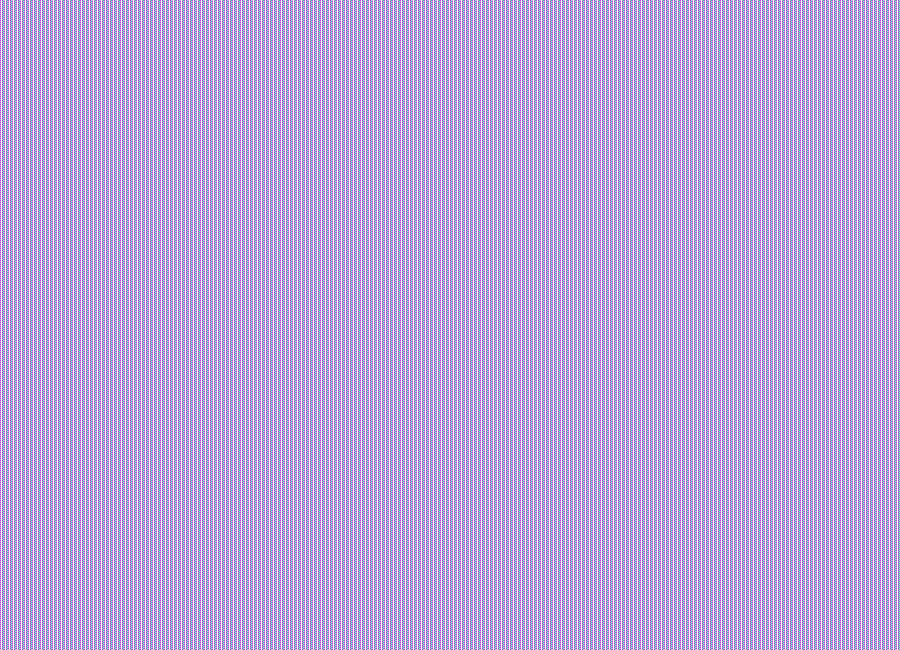

In [4]:
 
#plot Percentage Backup
#get the important cols
finalDF1 = result[['dates','PercentageBackUp', 'DECALowestPrice(ETH)', 'DECAPrice(ETH)']]
finalDF1 = finalDF1.set_index('dates', drop = True) 
display(finalDF1)
#to excel
#finalDF1.to_csv("PercentageBackUp.csv")
#prepare chart

fig, ax = plt.subplots(figsize=(9, 6.5))
ax3 = ax.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.20))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.7)

finalDF1['PercentageBackUp'].plot(ax=ax, style='b-')
# same ax as above since it's automatically added on the right
finalDF1['DECALowestPrice(ETH)'].plot(ax=ax, style='r-', secondary_y=True)
finalDF1['DECAPrice(ETH)'].plot(ax=ax3, style='g-')

#Set Y Axis Limits
ax.set_ylim([0,100]) #Percentage backup
ax3.set_ylim([0,finalDF1['DECAPrice(ETH)'].max()*1.1]) #DECAPrice
ax.right_ax.set_ylim([0,finalDF1['DECAPrice(ETH)'].max()/10]) #DecaLowestPrice

#set Y Labels:
ax.set_ylabel('CC Percentage Backup (%)', fontsize='medium') #Percentage backup
ax3.set_ylabel('DECA Price (ETH)', fontsize='medium') #DECAPrice
ax.right_ax.set_ylabel('DECA Lowest Price (ETH)', fontsize='medium') #DecaLowestPrice

# add legend --> take advantage of pandas providing us access
# to the line associated with the right part of the axis
ax3.legend([ax.get_lines()[0], ax.right_ax.get_lines()[0], ax3.get_lines()[0]],\
           ['CC Percentage Backup (%)','DECA Lowest Price (ETH)','DECA Price(ETH)'],loc = 'upper center', bbox_to_anchor=(0.5, 1.0))
#plt.savefig("DecaMarketLowest.png")
#finalDF1.plot()

In [5]:
### Extension proposal for next 3 years
### 3 times 365 +1
daysToAdd = 1096

#create the DataFrame Days
#get the last day
ICOEnds = dRan1[[-1]].strftime("%m-%d-%Y")
dRan2 = pd.date_range(start = ICOEnds[0], periods = daysToAdd) 
#remove first day which is preICOEnds
dRan2 = dRan2[1:]
df4 = pd.DataFrame(dRan2)
df4 = df4.rename(columns={0: "dates"})

#AfterICOStartDate first day
AfterICOStarts = dRan2[[0]].strftime("%m-%d-%Y")

#take the last Deca Total Supply since there won't be more
df4['DecaTotalSupply'] = result.loc[len(result) -1 ,'DecaTotalSupply']
#take the last Ethereum Total Supply since there won't be more
df4['EthereumTotalSupply'] = result.loc[len(result) -1 ,'EthereumTotalSupply']
#define dates and % backup and EthereumPrice list for buying and canceling carbon credits
dates = [[AfterICOStarts[0],0 ,1],
         ['04-23-2021', 5, 1], # each 219 days...
         ['11-28-2021', 10, 1],
         ['07-05-2022', 15, 1],
         ['02-09-2023', 20, 1]]
'''
    we write multiple whiles for each column calculation to make it easier to understand.
'''

#import pdb; pdb.set_trace()
#while for getting percentages as bought and cc cancelation:
df4['ccPriceSum(ETH)'] = ccPriceSum
#percent variable for debug
#df4['percent'] = 0
#each day
i = 0
#each date from dates list
date = 0
while i < (daysToAdd - 1):
    #get the current day
    currentDay = df4.loc[i,'dates'].strftime("%m-%d-%Y")
    #if the day is a define date, add the price and change to next date data
    if currentDay == dates[date][0]:
        #first we buy and cancel carbon credits with the current Ethereum Price
        df4.loc[i,'ccPriceSum(ETH)'] +=  df4.loc[i,'EthereumTotalSupply'] * (dates[date][1]/100)
        #then we take out the percentage from eth and update the eth supply
        df4.loc[i,'EthereumTotalSupply'] = df4.loc[i,'EthereumTotalSupply'] * (1 - dates[date][1]/100)
        #df4.loc[i,'percent'] = dates[date][1]
        if date <= len(dates[0]):
            date+=1
        i+=1
    else:
        #Keep Last Change Price bought
        df4.loc[i,'ccPriceSum(ETH)'] =  df4.loc[i-1,'ccPriceSum(ETH)']
        #Keep Last Change
        df4.loc[i,'EthereumTotalSupply'] = df4.loc[i-1,'EthereumTotalSupply']
        i+=1

#Price Per Deca
# based on price formula  PPD (ETH) = (ccPriceSum + ethPriceSum) / DTS
df4['DECAPrice(ETH)'] = 0
for i in range(daysToAdd-1):
    df4.loc[i,'DECAPrice(ETH)'] = (df4.loc[i,'ccPriceSum(ETH)'] 
                                 + df4.loc[i,'EthereumTotalSupply'] ) / df4.loc[i,'DecaTotalSupply']
# LOWEST Price Per Deca
# based on price formula  PPD = (ccPriceSum) / DTS
df4['DECALowestPrice(ETH)'] = 0
for i in range(daysToAdd-1):
    df4.loc[i,'DECALowestPrice(ETH)'] = (df4.loc[i,'ccPriceSum(ETH)']) / df4.loc[i,'DecaTotalSupply']
    
# Percentage Backup
# based on PBCK = ( DECALowestPrice / DECAPrice) * 100
df4['PercentageBackUp'] = 0
for i in range(daysToAdd-1):
    df4.loc[i,'PercentageBackUp'] = (df4.loc[i,'DECALowestPrice(ETH)'] / df4.loc[i,'DECAPrice(ETH)']) * 100        
        

#debug changes in cc and %
'''
display(df4.loc[0])
print('---------------------------------------------------------------------------------')
display(df4.loc[218])
display(df4.loc[219])
display(df4.loc[220])
print('---------------------------------------------------------------------------------')
display(df4.loc[439])
display(df4.loc[440])
display(df4.loc[441])
print('---------------------------------------------------------------------------------')
display(df4.loc[1094])
'''
#carbon Credits backup
#df4['ccPriceSum'] = ccPriceSum
display(df4)


dates  DecaTotalSupply  EthereumTotalSupply  ccPriceSum(ETH)  \
0    2020-09-16     1.882487e+07              70000.0       106.611364   
1    2020-09-17     1.882487e+07              70000.0       106.611364   
2    2020-09-18     1.882487e+07              70000.0       106.611364   
3    2020-09-19     1.882487e+07              70000.0       106.611364   
4    2020-09-20     1.882487e+07              70000.0       106.611364   
...         ...              ...                  ...              ...   
1090 2023-09-11     1.882487e+07              56000.0     14106.611364   
1091 2023-09-12     1.882487e+07              56000.0     14106.611364   
1092 2023-09-13     1.882487e+07              56000.0     14106.611364   
1093 2023-09-14     1.882487e+07              56000.0     14106.611364   
1094 2023-09-15     1.882487e+07              56000.0     14106.611364   

      DECAPrice(ETH)  DECALowestPrice(ETH)  PercentageBackUp  
0           0.003724              0.000006          0.152070  
1           0.003724              0.000006          0.152070  
2           0.003724              0.000006          0.152070  
3           0.003724              0.000006          0.152070  
4           0.003724              0.000006          0.152070  
...              ...                   ...               ...  
1090        0.003724              0.000749         20.121656  
1091        0.003724              0.000749         20.121656  
1092        0.003724              0.000749         20.121656  
1093        0.003724              0.000749         20.121656  
1094        0.003724              0.000749         20.121656  

[1095 rows x 7 columns]

In [6]:
#join the ICO with the 3 years development.
resultICO = result[['dates','DecaTotalSupply','EthereumTotalSupply','ccPriceSum(ETH)','DECAPrice(ETH)','DECALowestPrice(ETH)','PercentageBackUp']]
df4 = df4[['dates','DecaTotalSupply','EthereumTotalSupply','ccPriceSum(ETH)','DECAPrice(ETH)','DECALowestPrice(ETH)','PercentageBackUp']]
resultFull = pd.concat([resultICO, df4], axis=0, sort=False)
#resultFull.to_csv("resultFull.csv")
display(resultFull)

dates  DecaTotalSupply  EthereumTotalSupply  ccPriceSum(ETH)  \
0    2020-07-01     2.444112e+05                910.0       106.611364   
1    2020-07-02     4.882331e+05               1820.0       106.611364   
2    2020-07-03     7.334387e+05               2730.0       106.611364   
3    2020-07-04     9.770812e+05               3640.0       106.611364   
4    2020-07-05     1.223363e+06               4550.0       106.611364   
...         ...              ...                  ...              ...   
1090 2023-09-11     1.882487e+07              56000.0     14106.611364   
1091 2023-09-12     1.882487e+07              56000.0     14106.611364   
1092 2023-09-13     1.882487e+07              56000.0     14106.611364   
1093 2023-09-14     1.882487e+07              56000.0     14106.611364   
1094 2023-09-15     1.882487e+07              56000.0     14106.611364   

      DECAPrice(ETH)  DECALowestPrice(ETH)  PercentageBackUp  
0           0.004159              0.000436         10.486934  
1           0.003946              0.000218          5.533621  
2           0.003868              0.000145          3.758406  
3           0.003834              0.000109          2.845541  
4           0.003806              0.000087          2.289462  
...              ...                   ...               ...  
1090        0.003724              0.000749         20.121656  
1091        0.003724              0.000749         20.121656  
1092        0.003724              0.000749         20.121656  
1093        0.003724              0.000749         20.121656  
1094        0.003724              0.000749         20.121656  

[1172 rows x 7 columns]

PercentageBackUp  DECALowestPrice(ETH)  DECAPrice(ETH)
dates                                                             
2020-07-01         10.486934              0.000436        0.004159
2020-07-02          5.533621              0.000218        0.003946
2020-07-03          3.758406              0.000145        0.003868
2020-07-04          2.845541              0.000109        0.003834
2020-07-05          2.289462              0.000087        0.003806
...                      ...                   ...             ...
2023-09-11         20.121656              0.000749        0.003724
2023-09-12         20.121656              0.000749        0.003724
2023-09-13         20.121656              0.000749        0.003724
2023-09-14         20.121656              0.000749        0.003724
2023-09-15         20.121656              0.000749        0.003724

[1172 rows x 3 columns]

<IPython.core.display.Javascript object>


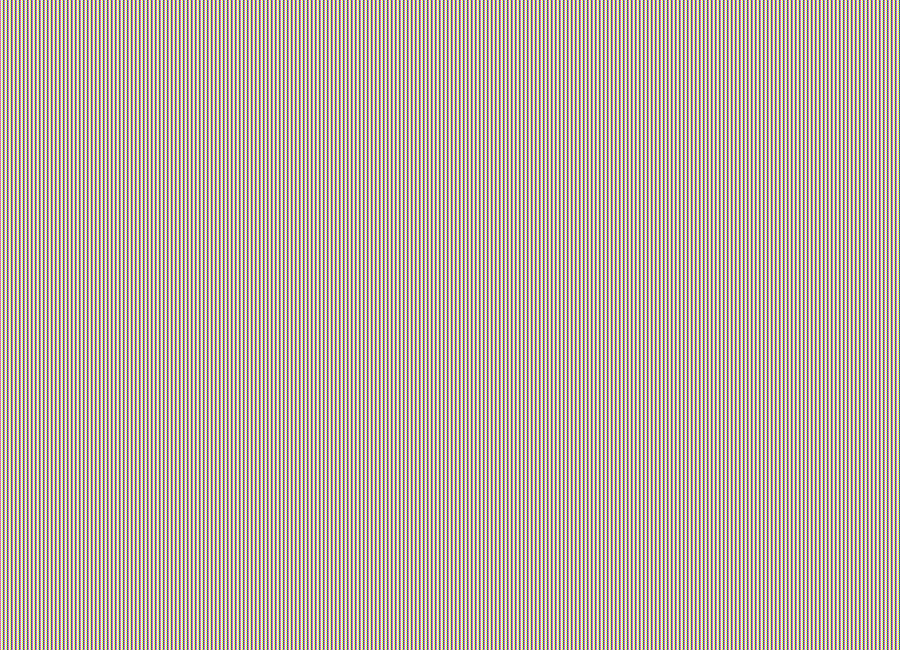

In [7]:
#plot Percentage Backup
#get the important cols
finalDF2 = resultFull[['dates','PercentageBackUp', 'DECALowestPrice(ETH)', 'DECAPrice(ETH)']]
finalDF2 = finalDF2.set_index('dates', drop = True) 
display(finalDF2)
#to excel
#finalDF2.to_csv("PercentageBackUpFinall.csv")
#prepare chart

fig, ax = plt.subplots(figsize=(9, 6.5))
ax3 = ax.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.20))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.7)

finalDF2['PercentageBackUp'].plot(ax=ax, style='b-')
# same ax as above since it's automatically added on the right
finalDF2['DECALowestPrice(ETH)'].plot(ax=ax, style='r-', secondary_y=True)
finalDF2['DECAPrice(ETH)'].plot(ax=ax3, style='g-')

#Set Y Axis Limits
ax.set_ylim([0,100]) #Percentage backup
ax3.set_ylim([0,finalDF2['DECAPrice(ETH)'].max()*1.1]) #DECAPrice
ax.right_ax.set_ylim([0,finalDF2['DECAPrice(ETH)'].max()/2]) #DecaLowestPrice
#set Y Labels:
ax.set_ylabel('CC Percentage Backup (%)', fontsize='medium') #Percentage backup
ax3.set_ylabel('DECA Price (ETH)', fontsize='medium') #DECAPrice
ax.right_ax.set_ylabel('DECA Lowest Price (ETH)', fontsize='medium') #DecaLowestPrice

# add legend --> take advantage of pandas providing us access
# to the line associated with the right part of the axis
ax3.legend([ax.get_lines()[0], ax.right_ax.get_lines()[0], ax3.get_lines()[0]],\
           ['CC Percentage Backup (%)','DECA Lowest Price (ETH)','DECA Price(ETH)'],loc = 'upper center', bbox_to_anchor=(0.5, 1.0))
#plt.savefig("DecaMarketLowestFull.png")
#finalDF2.plot()